In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pickle
import Rheology_fitting_toolkit as rft
from tqdm.auto import tqdm
from matplotlib.patches import Rectangle
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_80884/578038577.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dictionary_all_events = {}
CREEPMETER = ['XHR']
for q in range(len(CREEPMETER)):
    print(CREEPMETER[q])
    tm, min10_creep, tm2, min10_creep2 = rft.import_text(CREEPMETER[q])

    if CREEPMETER[q] == 'XSJ' or CREEPMETER[q] == 'XHR' or CREEPMETER[q] == 'XPK':
        tm_int, min10_creep_int = rft.interpolate(tm,min10_creep,CREEPMETER)
        tm_int2, min10_creep_int2 = rft.interpolate(tm2,min10_creep2,CREEPMETER)
    elif CREEPMETER[q] == 'XMR':
        tm_int, min10_creep_int = rft.interpolate(tm,min10_creep,CREEPMETER)
        tm_int2, min10_creep_int2 = rft.interpolate_1min(tm2,min10_creep2,CREEPMETER)
    else:
        tm_int, min10_creep_int = rft.interpolate(tm,min10_creep,CREEPMETER)


    df_PICKS, duration, START = rft.creepmeter_events(CREEPMETER[q])

    if CREEPMETER[q] == 'XSJ' or CREEPMETER[q] == 'XHR' or CREEPMETER[q] == 'XPK':
        data1  = rft.vel_acc(tm_int,min10_creep_int,10/60)
        data2 = rft.vel_acc(tm_int2,min10_creep_int2,10/60)
        data = pd.concat([data1,data2],ignore_index=True)
    elif CREEPMETER[q] == 'XMR':
        data1  = rft.vel_acc(tm_int,min10_creep_int,10/60)
        data2 = rft.vel_acc_1min(tm_int2,min10_creep_int2,1/60)
        data = pd.concat([data1,data2],ignore_index=True)
    else:
        data = rft.vel_acc(tm_int,min10_creep_int,10/60)


    df_auto = rft.parkfield_remover(df_PICKS,CREEPMETER[q])


    df_rain_day_total = rft.rain_timeseries(CREEPMETER[q])

    df_auto = rft.when_does_it_rain(df_auto,CREEPMETER[q])
    
    if CREEPMETER[q] == 'CWN':
        C_matrix = np.load('../../Rheology/CWN/CWN_covariance_matrix_12days_18_APR_23.npy')
        C_matrix_inv_CWN = np.linalg.inv(C_matrix)
    
    if CREEPMETER[q] == 'XHR':
        C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
        C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
        C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
        C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
    

    
    dataframes_long, creep_index_long = rft.creep_event_dataframe(df_auto,duration, START, data,CREEPMETER[q])
    dataframes, creep_index = rft.creep_event_dataframe_short(dataframes_long,df_auto)

    Creep_phases = pd.read_csv("../../Rheology/{k}/Creep_phases_{k}.csv".format(k=CREEPMETER[q]),index_col=0)

XHR


In [3]:

event_no = []
slip = []
for i in tqdm(range(len(dataframes_long))):
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
                event_no.append(i)
                slip.append(dataframes_long[i]['Slip'].iloc[-1]-dataframes_long[i]['Slip'].iloc[0])
    except FileNotFoundError:
        print(f'{i}' + 'FNF')
        continue

  4%|▍         | 5/114 [00:00<00:02, 46.05it/s]

0FNF
1FNF
3FNF
5FNF
6FNF


 12%|█▏        | 14/114 [00:00<00:03, 26.50it/s]

12FNF


 23%|██▎       | 26/114 [00:00<00:03, 26.83it/s]

20FNF
21FNF
23FNF


 37%|███▋      | 42/114 [00:01<00:01, 46.70it/s]

28FNF
29FNF
31FNF
32FNF
33FNF
34FNF
35FNF
36FNF
37FNF
38FNF
40FNF
42FNF
43FNF


 46%|████▋     | 53/114 [00:01<00:01, 37.20it/s]

50FNF
51FNF
54FNF
55FNF
57FNF
58FNF
59FNF
60FNF
61FNF
62FNF
63FNF


 64%|██████▍   | 73/114 [00:01<00:00, 51.39it/s]

65FNF
66FNF
69FNF
70FNF
71FNF
73FNF
74FNF
75FNF
76FNF
78FNF


 80%|███████▉  | 91/114 [00:02<00:00, 61.14it/s]

80FNF
82FNF
83FNF
84FNF
85FNF
86FNF
87FNF
89FNF


 86%|████████▌ | 98/114 [00:02<00:00, 49.08it/s]

92FNF
99FNF
100FNF


100%|██████████| 114/114 [00:02<00:00, 45.69it/s]

103FNF
104FNF
106FNF
107FNF
108FNF
109FNF
110FNF
111FNF
112FNF
113FNF


In [4]:
df_slip = pd.DataFrame({'Slip':slip})

# full event

In [ ]:
def calculate_aic(time, slip, C_inv, misfit, model_name):
    """
    Calculate the Akaike Information Criterion (AIC) for a given model fit.

    Args:
        time (array-like): Time data array.
        slip (array-like): Observed slip data array.
        C_inv (np.ndarray): Inverse covariance matrix.
        misfit (float): Normalized misfit value from the model fit.
        model_name (str): Model identifier to determine number of parameters.

    Returns:
        float: Calculated AIC value.

    Raises:
        ValueError: If `time` and `slip` shapes do not match or model_name is unknown.
    """
    # Validate input shapes
    slip = np.asarray(slip).flatten()
    time = np.asarray(time).flatten()
    
    if slip.shape != time.shape:
        raise ValueError("Time and slip arrays must have the same shape.")
        
    n = len(slip)  # Number of observations
    
    
    d = slip  # observed data vector

    C_matrix_inv_selection = C_inv[0:len(d),0:len(d)]
    
    # Calculate denominator D = d.T @ C_inv @ d
    denominator = np.matmul(np.array(d).T ,np.matmul(C_matrix_inv_selection,np.array(d)))
    
    # Recover weighted residual sum of squares (unnormalized misfit)
    weighted_rss = misfit * denominator
    
    # Define number of parameters k based on model name
    # Update or extend this dictionary as needed for other models
    params_dict = {
        'LNV': 9,
        'PLV': 10,
        'VSFSS': 9,
        'VSFaSS': 10,
        'VSFbSS': 10,
    }
    
    if model_name not in params_dict:
        raise ValueError(f"Model name '{model_name}' not recognized. Please add it to params_dict.")
    
    k = params_dict[model_name]
    
    # Calculate AIC
    # Protect against taking log of zero or negative by enforcing a small positive floor
    eps = 1e-12
    mean_rss = weighted_rss / n
    if mean_rss < eps:
        mean_rss = eps
    
    AIC = 2 * k + n * np.log(mean_rss)
    
    return AIC

In [ ]:
LNV_misfit = []
PLV_misfit = []
VSF_SS_misfit = []
VSF_aSS_misfit = []
VSF_bSS_misfit = []
LNV_AIC = []
PLV_AIC = []
VSF_SS_AIC = []
VSF_aSS_AIC = []
VSF_bSS_AIC = []
no_data_points = []
LNV_all_params = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
PLV_all_params = pd.DataFrame(columns =['Ts','Vs','K','T01','S1','Tau1','V01','n1','T02','S2'])
VSF_SS_all_params = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
VSF_aSS_all_params = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Ta1','V01','t1','T02','S2'])
VSF_bSS_all_params = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Tau1','V01','A_B1','T02','S2'])

C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
event_no = []
for i in tqdm(range(len(dataframes_long))):
    if i < 70:
        C_matrix_inv = C_matrix_inv_2
    else:
        C_matrix_inv = C_matrix_inv_3
    Creep_Phase_no = Creep_phases.iloc[i].dropna()
    number_of_phases = (len(Creep_Phase_no)/2)-1
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
                dictionary_VSF_bSS = pickle.load(tf)
                res_VSF_bSS = dictionary_VSF_bSS['fit']
                VSF_bSS_DF_params = dictionary_VSF_bSS['fitting params']
                df_bSS_append = pd.DataFrame([VSF_bSS_DF_params.loc['fitted'].values], columns=VSF_bSS_DF_params.loc['fitted'].index)
                VSF_bSS_all_params = pd.concat([VSF_bSS_all_params,df_bSS_append],ignore_index=True)
                event_no.append(i)
    except FileNotFoundError:
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_t1_2_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_aSS = pickle.load(tf)
            res_VSF_aSS = dictionary_VSF_aSS['fit']
            VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
            df_aSS_append = pd.DataFrame([VSF_aSS_DF_params.loc['fitted'].values], columns=VSF_aSS_DF_params.loc['fitted'].index)
            VSF_aSS_all_params = pd.concat([VSF_aSS_all_params,df_aSS_append],ignore_index=True)
    except FileNotFoundError:
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_SS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_SS['fit']
            VSF_SS_DF_params = dictionary_VSF_SS['fitting params']
            df_SS_append = pd.DataFrame([VSF_SS_DF_params.loc['fitted'].values], columns=VSF_SS_DF_params.loc['fitted'].index)
            VSF_SS_all_params = pd.concat([VSF_SS_all_params,df_SS_append],ignore_index=True)
    except FileNotFoundError:
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_PLV = pickle.load(tf)
            res_PLV = dictionary_PLV['fit']
            PLV_DF_params = dictionary_PLV['fitting params']
            df_PLV_append = pd.DataFrame([PLV_DF_params.loc['fitted'].values], columns=PLV_DF_params.loc['fitted'].index)
            PLV_all_params = pd.concat([PLV_all_params,df_PLV_append],ignore_index=True)    
    except FileNotFoundError:
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_LNV = pickle.load(tf)
            res_LNV = dictionary_LNV['fit']
            LNV_DF_params = dictionary_LNV['fitting params']
            df_LNV_append = pd.DataFrame([LNV_DF_params.loc['fitted'].values], columns=LNV_DF_params.loc['fitted'].index)
            LNV_all_params = pd.concat([LNV_all_params,df_LNV_append],ignore_index=True)
    except FileNotFoundError:
        continue
        
    test_t = np.array(dataframes_long[i].Time)
    rft.check_dir("../../Rheology/Single_rheology_28_APR_23/XHR/figures/Nelder-Mead".format(k=CREEPMETER[q]))
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    
    LNV_misfit.append(res_LNV.fun)
    PLV_misfit.append(res_PLV.fun)
    VSF_SS_misfit.append(res_VSF_SS.fun)
    VSF_aSS_misfit.append(res_VSF_aSS.fun)
    VSF_bSS_misfit.append(res_VSF_bSS.fun)

    LNV_AIC.append(calculate_aic(test_t,slip_LNV,C_matrix_inv,res_LNV.fun,'LNV'))
    PLV_AIC.append(calculate_aic(test_t,slip_PLV,C_matrix_inv,res_PLV.fun,'PLV'))
    VSF_SS_AIC.append(calculate_aic(test_t,slip_VSF,C_matrix_inv,res_VSF_SS.fun,'VSFSS'))
    VSF_aSS_AIC.append(calculate_aic(test_t,slip_VSF_aSS,C_matrix_inv,res_VSF_aSS.fun,'VSFaSS'))
    VSF_bSS_AIC.append(calculate_aic(test_t,slip_VSF_bSS,C_matrix_inv,res_VSF_bSS.fun,'VSFbSS'))


making figures


100%|██████████| 114/114 [00:12<00:00,  9.41it/s]


In [ ]:
LNV_all_params.rename(columns={'Tau1':'$t_c$','V01':'$V_0$'},inplace=True)

PLV_all_params.rename(columns={'Tau1':'$t_c$','V01':'$V_0$','n1':'n'},inplace=True)

VSF_SS_all_params.rename(columns={'Tau1':'$t_ss$','V01':'$V_0$'},inplace=True)

VSF_aSS_all_params.rename(columns={'Ta1':'$t_a$','V01':'$V_0$','t1':'$t_1$'},inplace=True)

VSF_bSS_all_params.rename(columns={'Tau1':'$\theta_0$','V01':'$V_0$','A_B1':'$B/A$'},inplace=True)

    

In [24]:
colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']

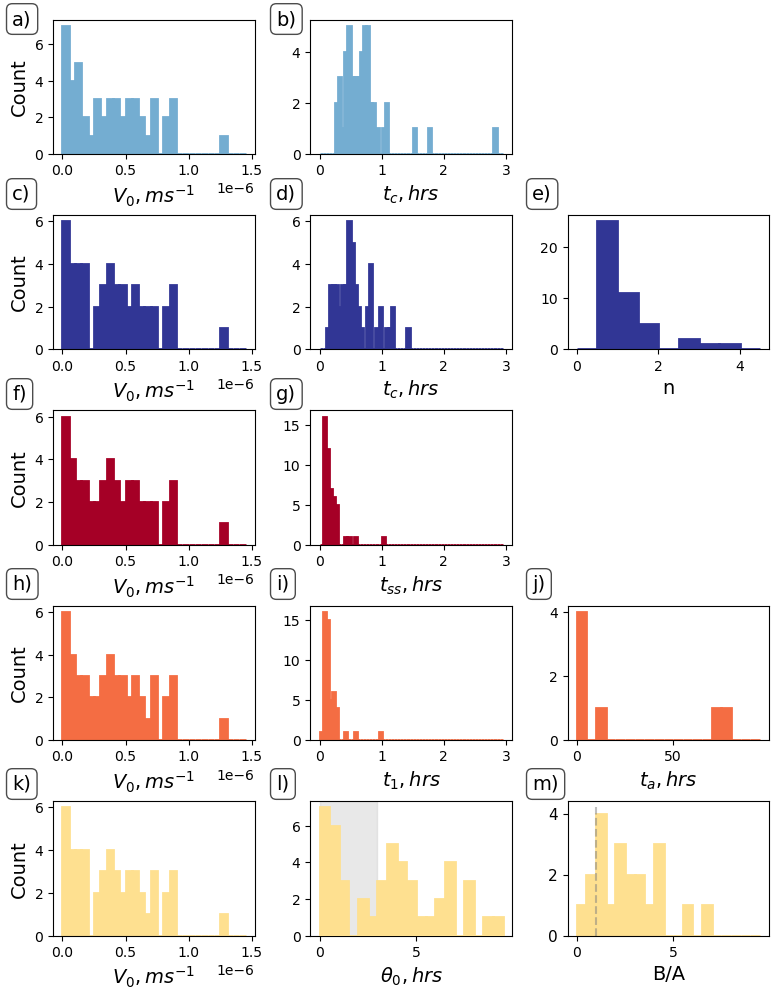

In [ ]:
plt.close('all')
plt.figure()
ax1=plt.subplot2grid((5,3),(0,0),1,1)
bins = np.arange(0,0.0015/1000,0.00005/1000)#bins = np.linspace(0,5,51)
plt.hist(LNV_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[3], linewidth=2,color = colors[3])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)

ax4 = plt.subplot2grid((5,3),(1,0),1,1)
plt.hist(PLV_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)

ax7 = plt.subplot2grid((5,3),(2,0),1,1)
plt.hist(VSF_SS_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[0], linewidth=2,color = colors[0])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)


ax10 = plt.subplot2grid((5,3),(3,0),1,1)
plt.hist(VSF_aSS_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)

ax13 = plt.subplot2grid((5,3),(4,0),1,1)
plt.hist(VSF_bSS_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)

ax2 = plt.subplot2grid((5,3),(0,1),1,1)
bins = np.arange(0,3,0.05)
plt.hist(LNV_all_params['$t_c$'],bins=bins,histtype = 'bar',edgecolor=colors[3], linewidth=2,color = colors[3])
plt.xlabel('$t_c, hrs$',fontsize=14)


ax5 = plt.subplot2grid((5,3),(1,1),1,1)
plt.hist(PLV_all_params['$t_c$'],bins=bins,histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4])
plt.xlabel('$t_c, hrs$',fontsize=14)

ax8 = plt.subplot2grid((5,3),(2,1),1,1)
plt.hist(VSF_SS_all_params['$t_ss$'],bins=bins,histtype = 'bar',edgecolor=colors[0], linewidth=2,color = colors[0])
plt.xlabel('$t_{ss}, hrs$',fontsize=14)

ax11 = plt.subplot2grid((5,3),(3,1),1,1)
plt.hist(VSF_aSS_all_params['$t_1$'],bins=bins,histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1])
plt.xlabel('$t_1, hrs$',fontsize=14)


ax14 = plt.subplot2grid((5,3),(4,1),1,1)
bins = np.arange(0,10,0.5)
plt.hist(VSF_bSS_all_params['$\theta_0$'],bins=bins,histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2],zorder=100)
left,right = ax14.get_xlim()
bottom,top = ax14.get_ylim()
ax14.add_patch(Rectangle((0,bottom),3,top-bottom, facecolor='lightgrey', edgecolor='lightgrey',alpha=0.5,zorder=2))
plt.xlabel("$\\theta_0 , hrs$",fontsize=14)

ax6 = plt.subplot2grid((5,3),(1,2),1,1)
bins=np.arange(0,5,0.5)
plt.hist(PLV_all_params['n'],histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4],bins=bins)
plt.xlabel('n',fontsize=14)

ax12 = plt.subplot2grid((5,3),(3,2),1,1)
bins=np.arange(0,100,5)
plt.hist(VSF_aSS_all_params['$t_a$'],histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1],bins=bins)
plt.xlabel('$t_a, hrs$',fontsize=14)
bins=np.arange(0,10,0.5)

ax15 = plt.subplot2grid((5,3),(4,2),1,1)
plt.hist(VSF_bSS_all_params['$B/A$'],histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2],bins=bins)
plt.yticks(fontsize=14)
plt.xlabel("b/a",fontsize=14)
plt.yticks(fontsize=11)
bottom,top = ax15.get_ylim()
ax15.plot([1,1],[bottom,top],color='grey',alpha=0.5,linestyle='--')

figure = plt.gcf()
figure.subplots_adjust(left=0.101, bottom=0.064, right=0.996, top=0.980, wspace=0.276, hspace=0.453)
figure.set_size_inches(8,10)
figure.text(0.05,0.975,'a)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.975,'b)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.8,'c)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.8,'d)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.8,'e)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.60,'f)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.60,'g)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.41,'h)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.41,'i)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.41,'j)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.21,'k)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.21,'l)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.21,'m)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
plt.show()

In [38]:
data_lines_XHR = pd.DataFrame({'LNV':LNV_misfit,'PLV':PLV_misfit,'VSF_SS':VSF_SS_misfit,'VSF_aSS':VSF_aSS_misfit,'VSF_bSS':VSF_bSS_misfit})
rheology_XHR = data_lines_XHR.idxmin(axis=1,skipna=True)
LNV_Count_XHR   = (np.sum(rheology_XHR.str.count("LNV"))/len(LNV_misfit))*100
PLV_Count_XHR  = (np.sum(rheology_XHR.str.count("PLV"))/len(PLV_misfit))*100
VSF_SS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_SS"))/len(VSF_SS_misfit))*100
VSF_aSS_Count_XHR = (np.sum(rheology_XHR.str.count("VSF_aSS"))/len(VSF_aSS_misfit))*100
VSF_bSS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_bSS"))/len(VSF_bSS_misfit))*100
print('Linear Viscous Flow %: {k}'.format(k=LNV_Count_XHR.round(0)))
print('Power-law Viscous Flow %: {k}'.format(k=PLV_Count_XHR.round(0)))
print('Velocity Strenthening Friction, SS %: {k}'.format(k=VSF_SS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S > SS %: {k}'.format(k=VSF_aSS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S << SS %: {k}'.format(k=VSF_bSS_Count_XHR.round(0)))

Linear Viscous Flow %: 2.0
Power-law Viscous Flow %: 74.0
Velocity Strenthening Friction, SS %: 0.0
Velocity Strenthening Friction, S > SS %: 8.0
Velocity Strenthening Friction, S << SS %: 16.0


In [39]:
AIC = pd.DataFrame({'LNV':LNV_AIC,'PLV':PLV_AIC,'VSF_SS':VSF_SS_AIC,'VSF_aSS':VSF_aSS_AIC,'VSF_bSS':VSF_bSS_AIC})
rheology_XHR = AIC.idxmin(axis=1,skipna=True)
LNV_Count_XHR   = (np.sum(rheology_XHR.str.count("LNV"))/len(LNV_misfit))*100
PLV_Count_XHR  = (np.sum(rheology_XHR.str.count("PLV"))/len(PLV_misfit))*100
VSF_SS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_SS"))/len(VSF_SS_misfit))*100
VSF_aSS_Count_XHR = (np.sum(rheology_XHR.str.count("VSF_aSS"))/len(VSF_aSS_misfit))*100
VSF_bSS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_bSS"))/len(VSF_bSS_misfit))*100
print('Linear Viscous Flow %: {k}'.format(k=LNV_Count_XHR.round(0)))
print('Power-law Viscous Flow %: {k}'.format(k=PLV_Count_XHR.round(0)))
print('Velocity Strenthening Friction, SS %: {k}'.format(k=VSF_SS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S > SS %: {k}'.format(k=VSF_aSS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S << SS %: {k}'.format(k=VSF_bSS_Count_XHR.round(0)))

Linear Viscous Flow %: 40.0
Power-law Viscous Flow %: 42.0
Velocity Strenthening Friction, SS %: 2.0
Velocity Strenthening Friction, S > SS %: 6.0
Velocity Strenthening Friction, S << SS %: 10.0


In [ ]:
DAIC_LNV = []
DAIC_PLV = []
DAIC_VSF_SS = []
DAIC_VSF_aSS = []
DAIC_VSF_bSS = []
for i in range(len(AIC)):
    DAIC_LNV.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['LNV'])
    DAIC_PLV.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['PLV'])
    DAIC_VSF_SS.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['VSF_SS'])
    DAIC_VSF_aSS.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['VSF_aSS'])
    DAIC_VSF_bSS.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['VSF_bSS'])
AIC['delta_AIC_LNV'] = DAIC_LNV
AIC['delta_AIC_PLV'] = DAIC_PLV
AIC['delta_AIC_VSF_SS'] = DAIC_VSF_SS
AIC['delta_AIC_VSF_aSS'] = DAIC_VSF_aSS
AIC['delta_AIC_VSF_bSS'] = DAIC_VSF_bSS
AIC['Slip'] = df_slip['Slip']

In [ ]:
def flag_model_selection_uncertainty(aic_df, delta_cols):
    """
    Identify best models and flag uncertainty based on delta AIC values.

    For each row in the DataFrame, this function:
    - Determines the best model with the lowest AIC.
    - Finds models with delta AIC ≤ 2 (competitive models).
    - Flags uncertainty if more than one model is competitive.

    Args:
        aic_df (pd.DataFrame): DataFrame containing AIC and delta AIC values for models.
        delta_cols (list): List of column names in `aic_df` representing delta AIC for each model.

    Returns:
        pd.DataFrame: DataFrame with columns:
            - 'best_model': Model with lowest AIC.
            - 'competitive_models': List of models with delta AIC ≤ 2.
            - 'uncertain': Boolean flag indicating if model selection is uncertain.
    """
    results = []
    
    for idx, row in aic_df.iterrows():
        delta_values = row[delta_cols]
        
        # Get models with delta AIC ≤ 2
        competitive_models = [col.replace('delta_AIC_', '').upper()
                              for col in delta_cols if row[col] <= 2]
        
        best_model = row[['LNV', 'PLV', 'VSF_SS', 'VSF_aSS', 'VSF_bSS']].idxmin()
        
        results.append({
            'best_model': best_model,
            'competitive_models': competitive_models,
            'uncertain': len(competitive_models) > 1
        })
    
    return pd.DataFrame(results)


In [ ]:
delta_cols = ['delta_AIC_LNV', 'delta_AIC_PLV', 'delta_AIC_VSF_SS', 'delta_AIC_VSF_aSS', 'delta_AIC_VSF_bSS']
model_selection_flags = flag_model_selection_uncertainty(AIC, delta_cols)

# Combine with original dataframe
AIC = pd.concat([AIC, model_selection_flags], axis=1)

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_lnv,delta_AIC_plv,delta_AIC_vsfss,delta_AIC_vsfass,delta_AIC_vsfbss,Slip,best_model,competitive_models,uncertain
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True


In [ ]:
AIC['PLV_N'] = PLV_all_params['n']

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_lnv,delta_AIC_plv,delta_AIC_vsfss,delta_AIC_vsfass,delta_AIC_vsfbss,Slip,best_model,competitive_models,uncertain,PLV_N
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False,0.926243
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True,2.528452
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True,5.000000
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True,0.906107
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True,1.515351
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False,0.702201
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True,0.948891
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True,1.355462
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True,1.217909
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True,1.298931


In [47]:
AIC.to_csv('../../Rheology/AIC_XHR.csv')

In [62]:
# Count how many times each model was best
print(AIC['best_model'].value_counts())

# Percentage of events with uncertain selection
print(AIC['uncertain'].mean() * 100)  # in percent


best_model
PLV        21
LNV        20
VSF_bSS     5
VSF_aSS     3
VSF_SS      1
Name: count, dtype: int64
82.0


making figures
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']


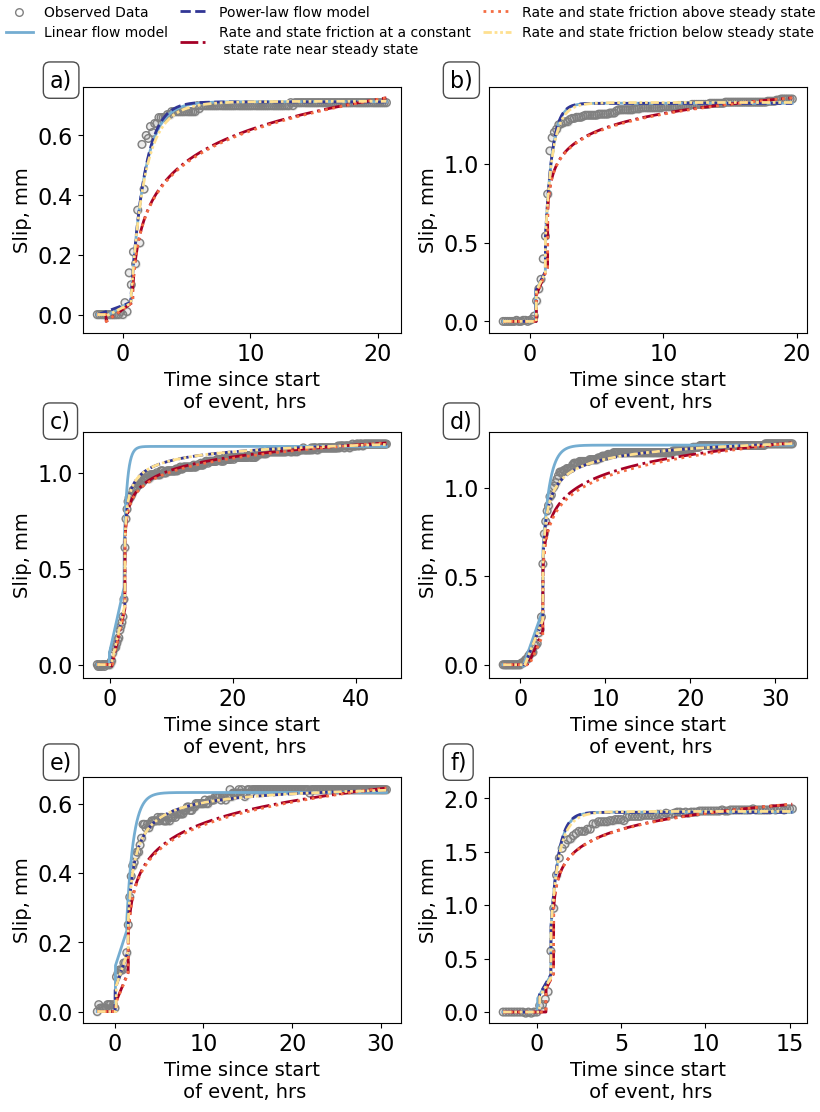

In [ ]:
print('making figures')
#%matplotlib qt
from matplotlib import ticker
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
selection = [105,88,72,64,30,4]
fig, axes = plt.subplots(nrows=3,ncols=2)#figure()
for j in range(len(selection)):
    i = selection[j]
    if i < 70:
        C_matrix_inv = C_matrix_inv_2
    else:
        C_matrix_inv = C_matrix_inv_3
    Creep_Phase_no = Creep_phases.iloc[i].dropna()
    number_of_phases = (len(Creep_Phase_no)/2)-1
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_bSS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_bSS['fit']
            VSF_bSS_DF_params = dictionary_VSF_bSS['fitting params']

    except FileNotFoundError:
        print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_aSS = pickle.load(tf)
            res_VSF_aSS = dictionary_VSF_aSS['fit']
            VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']

    except FileNotFoundError:
        print('FNF')
        continue

    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_SS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_SS['fit']
            VSF_SS_DF_params = dictionary_VSF_SS['fitting params']

    except FileNotFoundError:
        print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_PLV = pickle.load(tf)
            res_PLV = dictionary_PLV['fit']
            PLV_DF_params = dictionary_PLV['fitting params']
    except FileNotFoundError:
        print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_LNV = pickle.load(tf)
            res_LNV = dictionary_LNV['fit']
            LNV_DF_params = dictionary_LNV['fitting params']
    except FileNotFoundError:
        print('FNF')
        continue
        
    
    test_t = np.arange(0,max(dataframes_long[i].Time.iloc[1:]),0.01)
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']
    print(colors)

    test_df_alpha = pd.DataFrame(data_lines_XHR.iloc[np.where(np.array(event_no)==4)[0][0]].sort_values())
    test_df_alpha['alpha'] = [1,0.75,0.5,0.25,0.125]
    
    if (j % 2) == 0:
        y = 1
    else:
        y=0
    x=int(np.array(j/2.1).round(0))
    linewidth = 2
    axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,color='grey',alpha=0.15,marker='o',s=30)
    axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,facecolors='none', edgecolors='grey',marker='o',s=30)
    axes[x,y].plot(test_t-2,slip_LNV, color = colors[3], linewidth=linewidth, linestyle = '-')#,alpha=test_df_alpha['alpha'].loc['LNV'])
    axes[x,y].plot(test_t-2,slip_PLV, color = colors[4], linewidth=linewidth, linestyle = '--')#,alpha=test_df_alpha['alpha'].loc['PLV'])
    axes[x,y].plot(test_t-2,slip_VSF, color = colors[0], linewidth=linewidth, linestyle = '-.')#,alpha=test_df_alpha['alpha'].loc['VSF_SS'])
    axes[x,y].plot(test_t-2,slip_VSF_aSS, color = colors[1], linewidth=linewidth, linestyle = 'dotted')#,alpha=test_df_alpha['alpha'].loc['VSF_aSS'])
    axes[x,y].plot(test_t-2,slip_VSF_bSS, color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))#,alpha=test_df_alpha['alpha'].loc['VSF_bSS'])
    axes[x,y].set_xlabel('Time since start\n of event, hrs', fontsize=14)
    axes[x,y].set_ylabel('Slip, mm',fontsize=14)

axes[2,1].set_ylim([-0.1,2.2])
axes[1,1].scatter([],[], label='Observed Data',facecolors='none', edgecolors='grey',marker='o',s=30)   
axes[1,1].plot([],[],label = 'Linear flow model', color = colors[3], linewidth=linewidth, linestyle = '-')
axes[1,1].plot([],[],label='Power-law flow model', color = colors[4], linewidth=linewidth, linestyle = '--')
axes[1,1].plot([],[],label = 'Rate and state friction at a constant\n state rate near steady state', color = colors[0], linewidth=linewidth, linestyle = '-.')
axes[1,1].plot([],[],label = 'Rate and state friction above steady state', color = colors[1], linewidth=linewidth, linestyle = 'dotted')
axes[1,1].plot([],[],label = 'Rate and state friction below steady state', color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))
figure = plt.gcf()  # get current figure
figure.set_size_inches(8,11)
figure.text(0.05,0.93,'a)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.93,'b)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.62,'c)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.62,'d)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.31,'e)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.31,'f)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.legend(ncol=3, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10)
figure.subplots_adjust(left=0.091, bottom=0.079, right=0.996, top=0.930, wspace=0.276, hspace=0.403) #full event

#plt.tight_layout()
#plt.savefig('../../Thesis_figs/Rheology_examples_data_atop.pdf')
#plt.savefig('../../Thesis_figs/Rheology_examples_data_atop_short_fit.pdf')
#plt.savefig('/media/exet4136/C984-C1A3/Rheology_examples_data_atop_short_fit.pdf')
    